### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:
import tweepy # To fetch data from twitter using api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import LancasterStemmer
from bs4 import BeautifulSoup
import re,unicodedata,string
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob,Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##  <mark><span  style= "font-family: Times New Roman">Data loading</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [2]:
data = pd.read_csv('Twitter_Omicron_data_1_1_1_1_1 (1).csv')
data.head(10)

,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1
5,FGS @UKHSA pauses ONS C-19 Infection Survey 4 ...,0,2023-03-09 18:12:53,0
6,"@SandraHelena39 Look on the bright side, Omicr...",0,2023-03-09 18:12:48,0
7,@OMICRON_XBB Dream bigger,0,2023-03-09 18:11:32,0
8,@NOTSubzerodrew As my last wish,0,2023-03-09 18:10:28,0
9,"@thereal_truther @SadieXShaw Again, graphs are...",0,2023-03-09 18:10:23,0


In [3]:
data.shape

(6998, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweets         6998 non-null   object
 1   likes          6998 non-null   int64 
 2   time           6998 non-null   object
 3   retweet_count  6998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.8+ KB


In [5]:
data.isnull().sum()

tweets           0
likes            0
time             0
retweet_count    0
dtype: int64

##  <mark><span  style= "font-family: Times New Roman">Exploratory data analysis</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [6]:
data.describe()

,likes,retweet_count
count,6998.000000,6998.000000
mean,7.253930,1.795513
std,87.700065,26.269914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,4601.000000,1622.000000


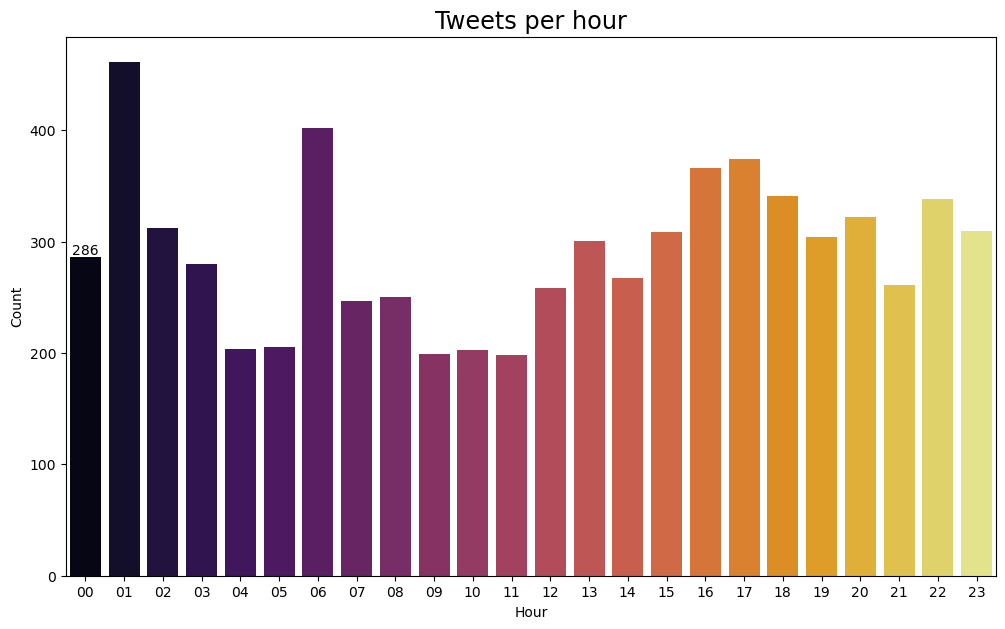

In [7]:
# change to date time format
data['time']=pd.to_datetime(data['time'])

# tweets per hour
tweets_per_hr = data['time'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index

# plot
plt.figure(figsize=(12,7))
ax=sns.barplot(x='Hour', y='Count',data=tweets_per_hr, palette='inferno')
ax.bar_label(ax.containers[0])
plt.title('Tweets per hour', size='xx-large')
plt.show()

- Here we can observe that during the 0100 and 0600 hours the tweets reached its peak. 
- It might be so people after day shift would tweet about some incident or insights related to omicron variant that happened during the day or the people having their night shift would tweet about some news related to the same.
- We can also observe the tweets going high in number during the evening when people would talk and tweet about the omicron variant.

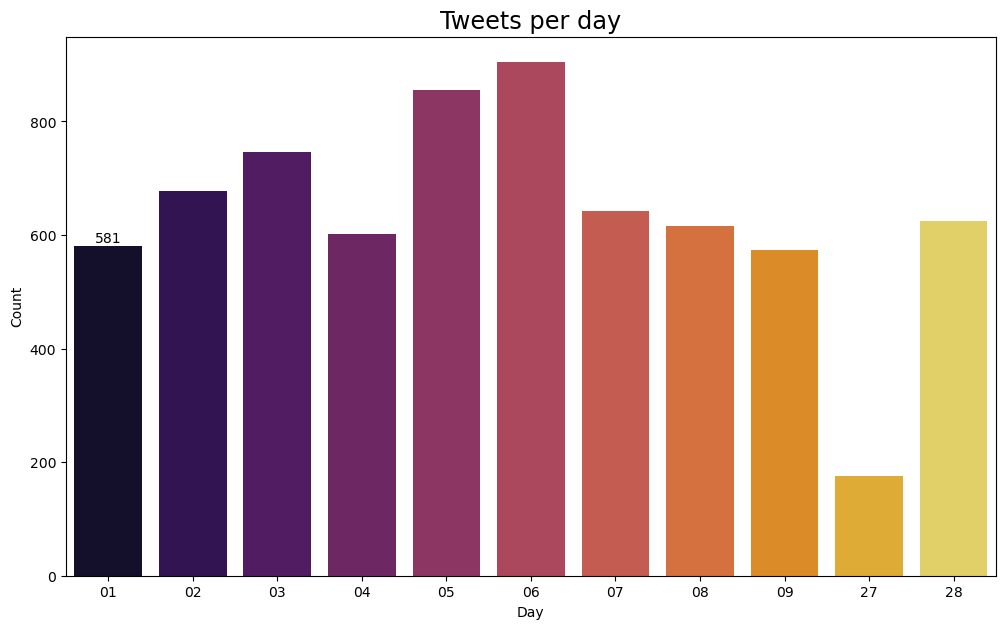

In [8]:
# tweets per day
tweets_per_day = data['time'].dt.strftime('%d').value_counts().sort_index().to_frame(name='Count')
tweets_per_day['Day']=tweets_per_day.index

# plot
plt.figure(figsize=(12,7))
ax=sns.barplot(x='Day', y='Count',data=tweets_per_day, palette='inferno')
ax.bar_label(ax.containers[0])
plt.title('Tweets per day', size='xx-large')
plt.show()

- It seems on 6th march 2023 the many tweets it may be due to cases of omicron variant increased in asia near Kazakhstan and Pakistan.
- The tweets were least made on 27th feb 2023 about omicron variant indicating appearance of the variant in Asia.

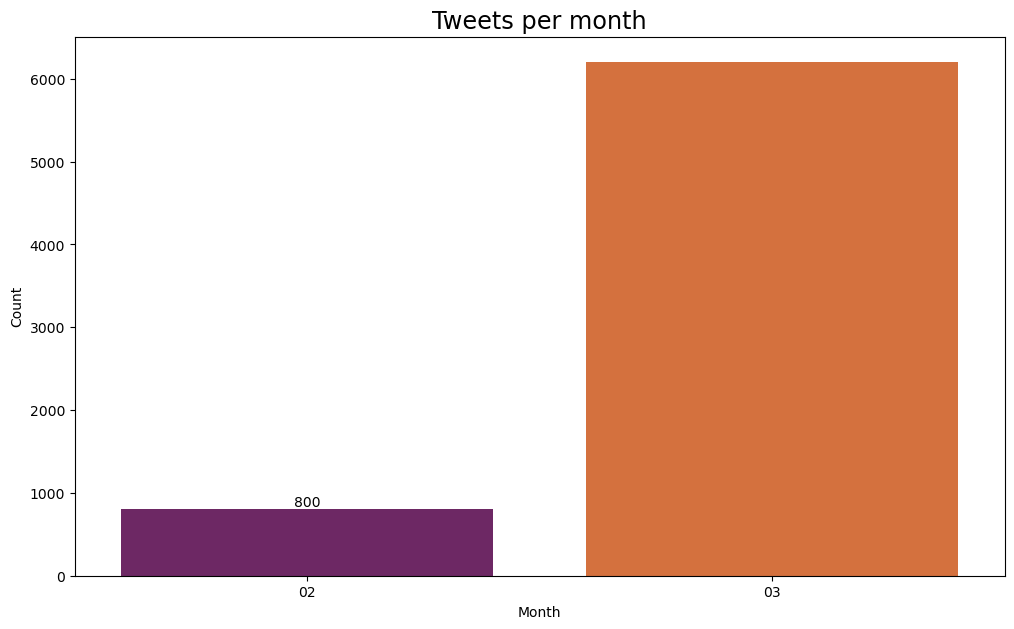

In [9]:
# tweets per month
tweets_per_month = data['time'].dt.strftime('%m').value_counts().sort_index().to_frame(name='Count')
tweets_per_month['Month']=tweets_per_month.index

# plot
plt.figure(figsize=(12,7))
ax=sns.barplot(x='Month', y='Count',data=tweets_per_month, palette='inferno')
ax.bar_label(ax.containers[0])
plt.title('Tweets per month', size='xx-large')
plt.show()

- Observing the tweets per day and tweets per month plots we can assume the omicron variant cases would have been on peak during end of feb and 1st week of march in 2023.
 - This may or may not be true, we would require more data to give significant insights about the tweets.

In [10]:
#Defining a function to clean the tweets
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # lemmatization
    tweet = [WordNetLemmatizer().lemmatize(word) for word in tweet.split(' ')]
    tweet = " ".join(tweet)
    # stopword removal
    tweet = [word for word in tweet.split(' ') if word not in set(stopwords.words('english'))]
    tweet=" ".join(tweet)
    
    return tweet

In [11]:
data['tweets']=data['tweets'].apply(preprocess_tweet_text)

In [13]:
data['tweets'][:10].tolist()

['6 big question new Omicrontargeting booster  Boosting Target targeting boost ',
 'Im confused ',
 'Long COVID le likely Omicron original virus Swiss   LabPulse ',
 'The finding dont tally high number see  bulletin \n\nMost research still report preOmicron infection need wait broader set studies\n\nArticle covering report  \n\n',
 'A conference abstract European Congress Clinical Microbiology amp Infectious Diseases suggested Omicron infection cause much le LongCovid wildtype SARSCoV2 \n\nExpert comment including  \n\n',
 'FGS  pause ONS C19 Infection Survey 4 many month govt decides whether continue funding Scientists warn UK left “flying blind” without survey particularly new variant related Omicron emerges ',
 ' Look bright side Omicron practically harmless way stronger longer immunity vaccine booster could ever give',
 ' Dream bigger',
 ' As last wish',
 '  Again graph useless definition faulty namely unvaccinated status We go back forth day long Suffice say though it’s waste time

- As we can see the tweets have been cleaned.
- Now we can perform sentiment analysis.

##  <mark><span  style= "font-family: Times New Roman">Sentiment analysis</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

data["Positive"] = [SIA.polarity_scores(i)["pos"] for i in data["tweets"]]
data["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in data["tweets"]]
data["Negative"] = [SIA.polarity_scores(k)["neg"] for k in data["tweets"]]

data1 = data[["tweets", "Positive","Neutral", "Negative"]]
data1.head(10)

,tweets,Positive,Neutral,Negative
0,6 big question new Omicrontargeting booster B...,0.421,0.579,0.000
1,Im confused,0.000,0.303,0.697
2,Long COVID le likely Omicron original virus Sw...,0.223,0.777,0.000
3,The finding dont tally high number see bullet...,0.000,0.945,0.055
4,A conference abstract European Congress Clinic...,0.000,1.000,0.000
5,FGS pause ONS C19 Infection Survey 4 many mon...,0.000,0.949,0.051
6,Look bright side Omicron practically harmless...,0.385,0.615,0.000
7,Dream bigger,0.667,0.333,0.000
8,As last wish,0.574,0.426,0.000
9,Again graph useless definition faulty namely...,0.075,0.695,0.231


In [19]:
sentiments_nltk = []

for tweet in data.tweets:
    sentiment_dict = SIA.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    
data['sentiment_nltk'] = sentiments_nltk
data['sentiment_nltk'].value_counts()

sentiment_nltk
neu    6633
neg     194
pos     171
Name: count, dtype: int64

So most of the opinions were neutral, which means that people were sharing information about the Omicron variant instead of sharing any positive or negative opinions.

In [20]:
data.head(10)

,tweets,likes,time,retweet_count,Positive,Neutral,Negative,sentiment_nltk
0,6 big question new Omicrontargeting booster B...,0,2023-03-09 18:24:06,0,0.421,0.579,0.000,neu
1,Im confused,0,2023-03-09 18:23:43,0,0.000,0.303,0.697,neg
2,Long COVID le likely Omicron original virus Sw...,0,2023-03-09 18:22:43,0,0.223,0.777,0.000,neu
3,The finding dont tally high number see bullet...,0,2023-03-09 18:21:45,0,0.000,0.945,0.055,neu
4,A conference abstract European Congress Clinic...,1,2023-03-09 18:21:45,1,0.000,1.000,0.000,neu
5,FGS pause ONS C19 Infection Survey 4 many mon...,0,2023-03-09 18:12:53,0,0.000,0.949,0.051,neu
6,Look bright side Omicron practically harmless...,0,2023-03-09 18:12:48,0,0.385,0.615,0.000,neu
7,Dream bigger,0,2023-03-09 18:11:32,0,0.667,0.333,0.000,pos
8,As last wish,0,2023-03-09 18:10:28,0,0.574,0.426,0.000,pos
9,Again graph useless definition faulty namely...,0,2023-03-09 18:10:23,0,0.075,0.695,0.231,neu


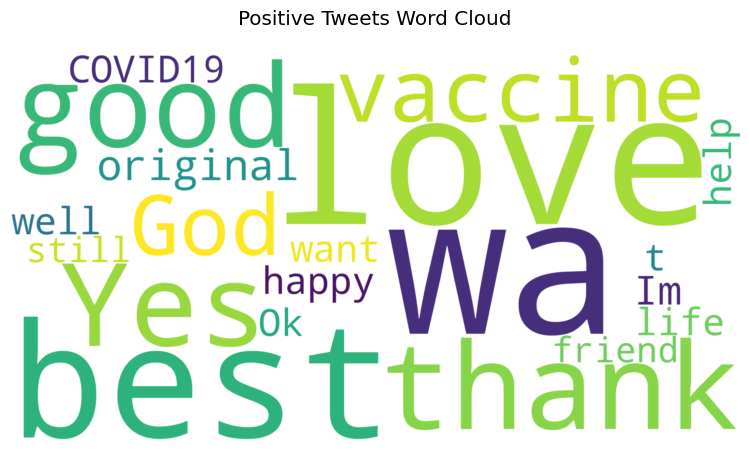

In [21]:
pos_tweets = " ".join(sentiment for sentiment in data[data['sentiment_nltk']=='pos']['tweets'])

# Creating word cloud of positive tweets
stopwords_p = STOPWORDS
stopwords_p.update(('omicron', 'covid', 'u', 'ha', 'amp','one','people','variant', 'mask'))
word_cloud1 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_p, #min_word_length=4,
                       width=2048, height=1080).generate(pos_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets Word Cloud\n', size='x-large')
plt.savefig('./positive.jpg',dpi=720)
plt.show()

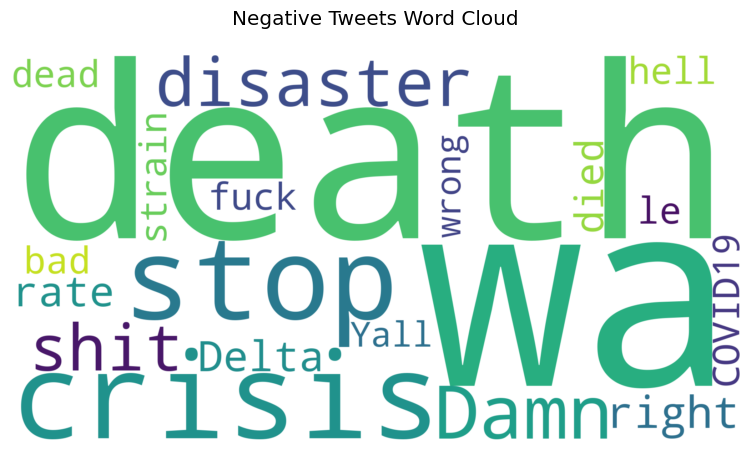

In [22]:
neg_tweets = " ".join(sentiment for sentiment in data[data['sentiment_nltk']=='neg']['tweets'])

# Creating word cloud of negative tweets
stopwords_n = STOPWORDS
stopwords_n.update(('vaccine','news','im','time','world'))
word_cloud2 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_n,
                       width=2048, height=1080).generate(neg_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets Word Cloud\n', size='x-large')
plt.savefig('./negative.jpg',dpi=720)
plt.show()

##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

- The sentiment analysis for the omicron variant data tells that the people had some negative and some positive opinions but most were neutral on sharing information through tweets.  
- Some went through crisis and deaths of the close friends and family.
- Some turned towards God while some helped people get through thier though times.
- But everyone was relieved as vaccines were developed and people started getting better.
- Most people focused on gaining and sharing knowledge and awareness of the situation.